<a href="https://colab.research.google.com/github/weilipan/MachineLearing/blob/main/3_%E6%A9%9F%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

出現次數:
5    183
1    180
3    178
2    161
4    154
6    144
dtype: int64
5    0.183
1    0.180
3    0.178
2    0.161
4    0.154
6    0.144
dtype: float64


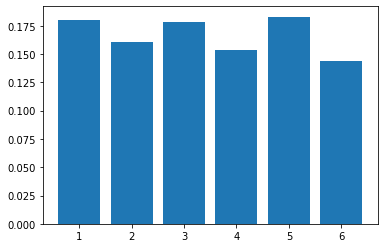

In [ ]:
#均勻分佈
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

size=1000
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
dice=np.random.choice(range(1,7),size=size,replace=True,p=[1/6]*6)
print("出現次數:")
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
print(pd.Series(dice).value_counts())
# 和下面的語法是一樣的freq=pd.Series(dice).value_counts()/size
freq=pd.Series(dice).value_counts(normalize=True)
print(freq)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
freq.sort_index(inplace=True)
plt.bar(range(1,7),freq)
plt.show()

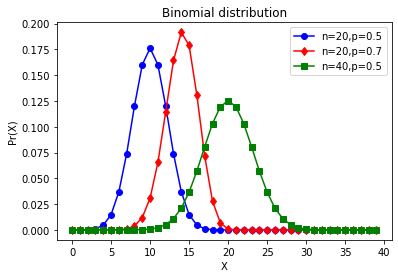

In [ ]:
# 二項式分佈（Binomial distribution）離散型機率分佈
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

k=np.arange(40)
params=[[20,0.5],[20,0.7],[40,0.5]]
style=['o-b','d-r','s-g']
for i,param in enumerate(params):
  plt.plot(k,stats.binom(param[0],param[1]).pmf(k),
          style[i],
          label=f'n={param[0]},p={param[1]}')
plt.title('Binomial distribution')
plt.legend()
plt.xlabel('X')
plt.ylabel('Pr(X)')
plt.show()


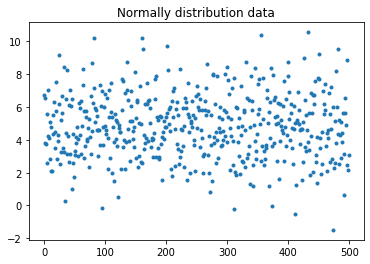

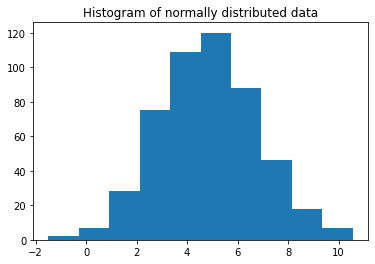

In [ ]:
# 常態分佈
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
size=500
data=stats.norm.rvs(5,2,size=size)
plt.plot(data,'.')
plt.title('Normally distribution data')
plt.show()
plt.hist(data)
plt.title('Histogram of normally distributed data')
plt.show()

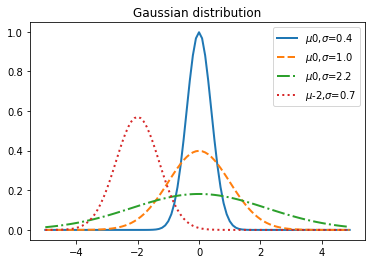

In [ ]:
# 高斯分佈
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

size=100
params=[[0,0.4],[0,1.],[0,2.2],[-2,0.7]]
x=np.arange(-5,5,0.1)
style=['-','--','-.',':']

for i, param in enumerate(params):
  y=stats.norm(param[0],param[1]).pdf(x)
  plt.plot(x,y,lw=2,ls=style[i],
           label=f'$\mu${param[0]},$\sigma$={param[1]}')
plt.title('Gaussian distribution')
plt.legend()
plt.show()

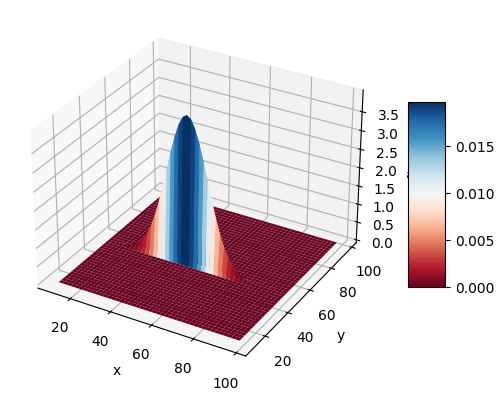

In [ ]:
# 二元或多元隨機變數，二元常態分佈
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
# 產生資料
# https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html
x,y = np.mgrid[10:100:2,10:100:2]
pos=np.empty(x.shape+(2,))
pos[:,:,0],pos[:,:,1]=x,y

# 設定x,y的平均分別為50,50
# 共變異矩陣則為[[100,0],[0,100]]
rv=multivariate_normal([50,50],[100,0],[0,100])

# 二元常態分佈的機率密度函數
z=rv.pdf(pos)
fig=plt.figure(dpi=100)
ax=fig.add_subplot(projection='3d')
surf=ax.plot_surface(x,y,z,cmap=cm.RdBu)

fig.colorbar(surf,shrink=0.5,aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.ticklabel_format(style='sci',axis='z',scilimits=(0,0))
plt.tight_layout()
plt.show()

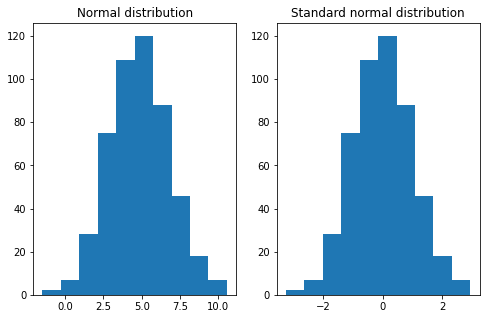

In [ ]:
# 常態分佈
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(data)
plt.title('Normal distribution')

# 標準常態分佈
plt.subplot(1,2,2)
data_std=(data-data.mean())/data.std()
plt.hist(data_std)
plt.title('Standard normal distribution')
plt.show()